In [46]:
import json
import os
import pickle
import gzip
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import tabulate
import numpy as np
import math

from itertools import cycle, islice


In [47]:
fig_width = 8
fig_height = 5

params = {
    'axes.labelsize': 12, # fontsize for x and y labels (was 10)
    'axes.titlesize': 12,
    #'text.fontsize': 8, # was 10
    'legend.fontsize': 12, # was 10
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'text.usetex': False,
    'figure.figsize': [fig_width,fig_height],
    'font.family': 'serif',
    'grid.linestyle': '--',
}

matplotlib.rcParams.update(params)

In [62]:
data_dir = 'priv_data'
out_dir = 'out'
appname = 'dyldo_first29_core_schemex-test-1'
#appname = 'dyldo_first29_full_schemex-test-1'
appname = 'citation-network-v1_schemex-test-1'
appname = 'synthetic-graph-schemex-test-1'
appname = 'cumulated_citation-network-v11_schemex-test-1'
#appname = 'dyldo_y2019_full_schemex-test-1'
#appname = 'LUBM10_schemex'
appname = 'LUBM10-2_schemex'
#appname = 'BSBM_schemex'
suffix = ''

In [63]:
frames = [None, None]

with open(os.path.join(data_dir, appname + '-changes.csv'), 'r') as f:
    df = pd.read_csv(f, sep=',')
    df.head()

    del df['NewlyObservedSchema (SE_new)']
    del df['DeletedSchemaStructures (SE_del)']

    del df['TotalNumberOfNewInstances'] 
    del df['InstanceAddedWithKnownSchema (PE_add)']
    del df['InstancesDeleted (PE_del)']
    del df['ChangedSchemaStructuresBecauseOfNeighbor'] 
    del df['PayloadEntriesAdded'] 
    del df['PayloadEntriesRemoved'] 
    del df['InstanceToSchemaLinksAdded'] 
    del df['InstanceToSchemaLinksRemoved'] 
    #tmp
    #del df['InstanceNotChanged (PE_mod)']
    del df['TotalNumberOfChangedPayloadElements (real PE_mod)']
    iterations = len(df['Iteration'])
    df = df.set_index('Iteration')

    print(df.columns)
    df.columns = ['Ext-MOD', 'Ext-Unchanged', 'Ext-ADD', 'Ext-DEL']    #'Modified pe(v)'
    df = df[['Ext-ADD', 'Ext-DEL', 'Ext-MOD','Ext-Unchanged']] #'Modified pe(v)'
    
    frames[0] = df
    

    





Index(['ChangedSchemaStructures (SE_mod)', 'InstanceNotChanged (PE_mod)',
       'TotalNumberOfSchemaElementsWritten',
       'TotalNumberOfSchemaElementsDeleted'],
      dtype='object')


In [ ]:
with open(os.path.join(data_dir, appname2 + '-changes.csv'), 'r') as f:
    df = pd.read_csv(f, sep=',')
    df.head()

    del df['NewlyObservedSchema (SE_new)']
    del df['DeletedSchemaStructures (SE_del)']

    del df['TotalNumberOfNewInstances'] 
    del df['InstanceAddedWithKnownSchema (PE_add)']
    del df['InstancesDeleted (PE_del)']
    del df['ChangedSchemaStructuresBecauseOfNeighbor'] 
    del df['PayloadEntriesAdded'] 
    del df['PayloadEntriesRemoved'] 
    del df['InstanceToSchemaLinksAdded'] 
    del df['InstanceToSchemaLinksRemoved'] 

    #tmp
    #del df['InstanceNotChanged (PE_mod)']
    del df['TotalNumberOfChangedPayloadElements (real PE_mod)']
    iterations = len(df['Iteration'])
    df = df.set_index('Iteration')
    
    df.columns = ['Core-MOD', 'Core-Unchanged', 'Core-ADD', 'Core-DEL']    #'Modified pe(v)'
    df = df[['Core-ADD', 'Core-DEL', 'Core-MOD','Core-Unchanged']] #'Modified pe(v)'
    
    frames[1] = df

df = pd.concat(frames, sort=False)

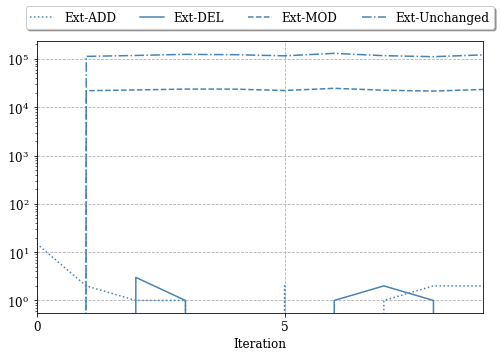

In [64]:

ax = df.plot(logy=True, style = [':','-','--','-.',':','-','--','-.',':','-','--','-.'],
             color=['steelblue', 'steelblue', 'steelblue', 'steelblue','indianred','indianred','indianred','indianred']) # 'gray',
#ax.set_ylabel("Quantity")
#ax.yaxis.set_label_coords(-0.015,1.0)
plt.xticks(np.arange(0, iterations, 5.0))
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), shadow=True, ncol=4)

plt.grid(True)
plt.savefig(out_dir + '/' + appname + '-changes.png')

In [65]:
frames = [None, None]

with open(os.path.join(data_dir, appname + '-performance.csv'), 'r') as f:
    df = pd.read_csv(f, sep=',')
    df.head()


    iterations = len(df['Iteration'])
    df = df.set_index('Iteration')

    del df['Load Graph']
    del df['Parse Graph']
    del df['Partition Graph']
    del df['Schema Computation']
    del df['Updates']
    df.columns = ['Ext-Incr', 'Ext-Batch']

    frames[0] = df





In [33]:
with open(os.path.join(data_dir, appname2 + '-performance.csv'), 'r') as f:
    df = pd.read_csv(f, sep=',')
    df.head()


    iterations = len(df['Iteration'])
    df = df.set_index('Iteration')

    del df['Load Graph']
    del df['Parse Graph']
    del df['Partition Graph']
    del df['Schema Computation']
    del df['Updates']
    df.columns = ['Core-Incr', 'Core-Batch']

    frames[1] = df    

df = pd.concat(frames, sort=False)


NameError: name 'appname2' is not defined

In [66]:
convert = lambda x: x /1000 /60
df = df.applymap(convert)    

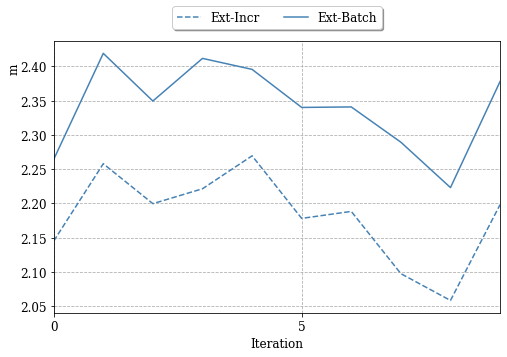

In [67]:

    
    
#df = df[['Incremental (total)', 'Batch (total)','Schema Computation', 'SG Updates (total)', 'SG Add', 'SG Delete', 'SG Read','Secondary Index Updates']]

#model_dtype = pd.api.types.CategoricalDtype(categories=['Incremental (total)', 'Batch (total)',
#                                                     'Schema Computation', 'SG Updates (total)', 
#                                                    'SG Add', 'SG Delete', 'SG Read',
#                                                    'Secondary Index Updates'], ordered=True)
#royalblue
#, 'dimgray', 'darkslateblue', 'darkmagenta', 'indianred', 'forestgreen','lightsteelblue'
ax = df.plot(logy=False, style = ['--','-','--','-'], color=['steelblue', 'steelblue','indianred', 'indianred'])
ax.set_xlabel("Iteration")
ax.set_ylabel("m")
ax.yaxis.set_label_coords(-0.075,.9)
plt.xticks(np.arange(0, iterations, 5.0))
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), shadow=True, ncol=4)
plt.grid(True)

plt.savefig(out_dir + '/' + appname + '-performance.png')

In [68]:
with open(os.path.join(data_dir, appname + '-update-time-and-space.csv'), 'r') as f:
    df = pd.read_csv(f, sep=',')
    df.head()

    tmpFrame = pd.DataFrame()
    tmpFrame['A'] = df['SE links']
    tmpFrame['B'] = df['Imprint links']

    #df['Secondary Index Size'] = tmpFrame.sum(axis=1)

    tmpFrame = pd.DataFrame()
    tmpFrame['A'] = df['Schema Elements (SE)']
    tmpFrame['B'] = df['Schema Relations (SR)']

    #df['Summary Graph Size'] = tmpFrame.sum(axis=1)

    del df['SecondaryIndex Read time (ms)']
    del df['SecondaryIndex Write time (ms)']
    del df['SecondaryIndex Del time (ms)']
    #--->
    del df['SecondaryIndex Total time (ms)']
    #<----
    del df['SE links']
    #del df['Imprint links']
    del df['Checksum links']
    #del df['Schema Elements (SE)']
    del df['Schema Relations (SR)']

    del df['SG Read time (ms)']
    del df['SG Write time (ms)']
    del df['SG Del time (ms)']

    del df['Sec. Index Size (bytes)']
    del df['Index Size (bytes)']
    del df['Graph Size (bytes)']
    #print(df)
    iterations = len(df['Iteration'])
    df = df.set_index('Iteration')
    #print(df.columns)
    df.columns = ['Ext-|V|', 'Ext-|SG|']
    
    frames[0] = df
    



In [ ]:
with open(os.path.join(data_dir, appname2 + '-update-time-and-space.csv'), 'r') as f:
    df = pd.read_csv(f, sep=',')
    df.head()

    tmpFrame = pd.DataFrame()
    tmpFrame['A'] = df['SE links']
    tmpFrame['B'] = df['Imprint links']

    #df['Secondary Index Size'] = tmpFrame.sum(axis=1)

    tmpFrame = pd.DataFrame()
    tmpFrame['A'] = df['Schema Elements (SE)']
    tmpFrame['B'] = df['Schema Relations (SR)']

    #df['Summary Graph Size'] = tmpFrame.sum(axis=1)

    del df['SecondaryIndex Read time (ms)']
    del df['SecondaryIndex Write time (ms)']
    del df['SecondaryIndex Del time (ms)']
    #--->
    del df['SecondaryIndex Total time (ms)']
    #<----
    del df['SE links']
    #del df['Imprint links']
    del df['Checksum links']
    #del df['Schema Elements (SE)']
    del df['Schema Relations (SR)']

    del df['SG Read time (ms)']
    del df['SG Write time (ms)']
    del df['SG Del time (ms)']

    del df['Sec. Index Size (bytes)']
    del df['Index Size (bytes)']
    del df['Graph Size (bytes)']
    #print(df)
    iterations = len(df['Iteration'])
    df = df.set_index('Iteration')
    #print(df.columns)
    df.columns = ['Core-|V|', 'Core-|SG|'] 
    
    frames[1] = df
    
    
df = pd.concat(frames, sort=False)  



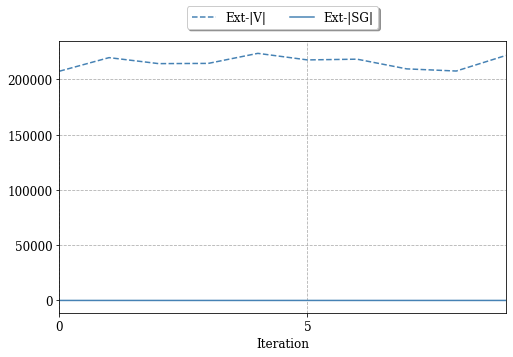

In [69]:
ax = df.plot(logy=False, style = ['--','-','--','-'],
             color=['steelblue', 'steelblue','indianred', 'indianred'])#,yticks=([math.exp(w) for w in np.arange(1, 10, 2)]))
#ax.set_ylim([2500, 80000])
#plt.yticks(np.arange(0, iterations, 5.0))
#plt.
plt.xticks(np.arange(0, iterations, 5.0))
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), shadow=True, ncol=4)
plt.grid(True)
plt.savefig(out_dir + '/' + appname + '-sizes.png')

#model_dtype = pd.api.types.CategoricalDtype(categories=['Characteristic Sets', 'W-Property Clique',
#                                                     'SemSets', 'SchemEX', 'TermPicker', 'SchemEX+U+oI',
#                                                     'SchemEX+U+pI'], ordered=True)

# model_dtype = pd.api.types.CategoricalDtype(categories=['Model-A', 'Model-B',
#                                                     'Model-C', 'Model-D', 'Model-E', 'Model-F',
#                                                     'Model-G'], ordered=True)

#config_dtype = pd.api.types.CategoricalDtype(categories=['SQ - 1k', 'SQ - 100k', 'SQ - 200k', 'CQ - 1k', 'CQ - 100k', 'SchemEX+U+oI',
 #                                                    'CQ - 200k'], ordered=True)

                  File    |V|     |E|  |Instances|  Avg. Types  SD Types  \
0    iteration-4.nq.gz  14136  127322        12365    1.389567  0.882524   
1   iteration-19.nq.gz  32773  199560        29258    1.394901  0.885728   
2   iteration-48.nq.gz  58056  243110        49800    1.376044  0.883322   
3   iteration-24.nq.gz  38728  223095        34288    1.387249  0.886924   
4   iteration-44.nq.gz  55897  228630        48019    1.378350  0.884158   
5   iteration-47.nq.gz  57554  239417        49394    1.375795  0.882960   
6   iteration-43.nq.gz  55286  226104        47537    1.379620  0.884682   
7    iteration-2.nq.gz  12033   48726        10460    1.384417  0.881684   
8   iteration-17.nq.gz  30223  187766        27077    1.389556  0.883780   
9   iteration-27.nq.gz  42019  230610        37057    1.387214  0.884495   
10  iteration-13.nq.gz  24935  166207        22605    1.383145  0.883744   
11   iteration-8.nq.gz  18584  191754        16938    1.377908  0.881784   
12  iteratio

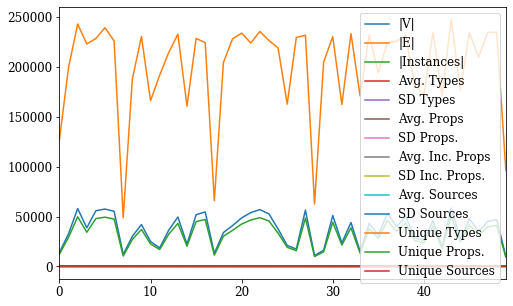

In [19]:
appname = 'euclidean-graph_10000n-10t-0_4-10p-4_10-50s-4a-3d-95dc'
with open(os.path.join(data_dir, appname + '-stats.csv'), 'r') as f:
    df = pd.read_csv(f, sep=',')
df.head()

print(df)

ax = df.plot(logy=False)